<a href="https://colab.research.google.com/github/congthuc521/Vo_Cong_Thuc_19146272/blob/main/banh_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D, MaxPool2D, Flatten
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tfa
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2)
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Banh/training_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'training',
                                               shuffle = True)
validation_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Banh/training_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical',
                                               subset = 'validation',
                                               shuffle = True)
test_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Banh/testing_data',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.
Found 0 images belonging to 0 classes.


In [4]:
from keras.models import Sequential
model=Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
from keras.layers import Flatten
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
from tensorflow.keras.optimizers import SGD

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_set,epochs=50,batch_size=64,validation_data=validation_set,verbose=1)

Epoch 1/50
2/2 [==============================] - 27s 5s/step - loss: 53.1722 - accuracy: 0.2500 - val_loss: 44.2359 - val_accuracy: 0.2500
Epoch 2/50
2/2 [==============================] - 0s 179ms/step - loss: 28.2173 - accuracy: 0.2500 - val_loss: 1.3174 - val_accuracy: 0.3125
Epoch 3/50
2/2 [==============================] - 0s 174ms/step - loss: 1.4034 - accuracy: 0.4219 - val_loss: 1.2983 - val_accuracy: 0.4375
Epoch 4/50
2/2 [==============================] - 0s 167ms/step - loss: 0.8113 - accuracy: 0.7188 - val_loss: 0.8758 - val_accuracy: 0.5000
Epoch 5/50
2/2 [==============================] - 0s 190ms/step - loss: 0.8199 - accuracy: 0.7969 - val_loss: 1.4097 - val_accuracy: 0.4375
Epoch 6/50
2/2 [==============================] - 0s 188ms/step - loss: 0.5265 - accuracy: 0.8594 - val_loss: 1.5503 - val_accuracy: 0.4375
Epoch 7/50
2/2 [==============================] - 0s 176ms/step - loss: 0.3801 - accuracy: 0.8438 - val_loss: 0.8001 - val_accuracy: 0.6875
Epoch 8/50
2/2 [===

In [ ]:
from matplotlib.image import imread 
results={'apple': 0,
 'banana': 1,
 'beetroot': 2,
 'bell pepper': 3,
 'cabbage': 4,
 'capsicum': 5,
 'carrot': 6,
 'cauliflower': 7,
 'chilli pepper': 8,
 'corn': 9}
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
import numpy as np
img = load_img('Image_6.jpg', target_size = (256,256))
#imshow('test.jpg')
image = imread('Image_6.jpg')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

In [5]:
model.save("banh.h5")

In [6]:
training_set.class_indices

{'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}

array([3])

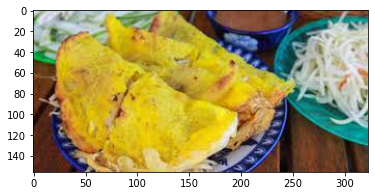

In [8]:
from matplotlib.image import imread 
results={'banh_da_lon': 0, 'banh_hoi': 1, 'banh_uot': 2, 'banh_xeo': 3}
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt 
import numpy as np
img = load_img('banh_xeo.jpg', target_size = (150,150))
#imshow('test.jpg')
image = imread('banh_xeo.jpg')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([2])

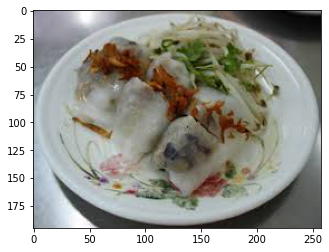

In [9]:
img = load_img('banh_uot.jpg', target_size = (150,150))
#imshow('test.jpg')
image = imread('banh_uot.jpg')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([1])

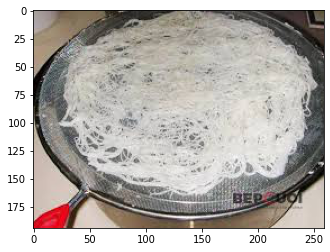

In [10]:
img = load_img('banh_hoi.jpg', target_size = (150,150))
#imshow('test.jpg')
image = imread('banh_hoi.jpg')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)

array([0])

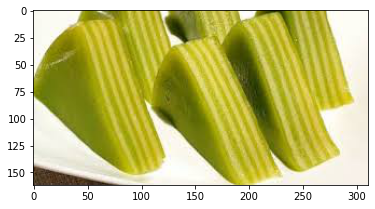

In [11]:
img = load_img('banh_da_lon.jpg', target_size = (150,150))
#imshow('test.jpg')
image = imread('banh_da_lon.jpg')
plt.imshow(image);
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis = 1)